In [34]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_selection import chi2
from scipy import stats

In [2]:
# Import the df_working object
df = pd.read_pickle("df_working.pkl")

In [4]:
# Verify the dataframe that I am working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
age                      32561 non-null int64
workclass                32561 non-null object
fnlwgt                   32561 non-null int64
education                32561 non-null object
education_num            32561 non-null int64
marital_status           32561 non-null object
occupation               32561 non-null object
relationship             32561 non-null object
race                     32561 non-null object
sex                      32561 non-null object
capital_gain             32561 non-null int64
capital_loss             32561 non-null int64
hours_per_week           32561 non-null int64
native_country           32561 non-null object
income                   32561 non-null object
age_bins                 32561 non-null category
fnlwgt_log               32561 non-null float64
binary_cap_gain          32561 non-null int32
binary_cap_loss          32561 non-null int32
hou

In [9]:
chisquare_df = df.copy()

# Create a binary feature to signify income > $50,000
chisquare_df["inc_over_fifty"] = np.where(chisquare_df["income"]==">50K",1,0)

In [91]:
# List of columns for encoding
encoder_list = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# Instantiante the label encoder
label_encoder = LabelEncoder()

# Loop over the columns for encodeing
for col in encoder_list: 
    chisquare_df[col] = label_encoder.fit_transform(chisquare_df[col])

# Take a look at the chisquare_df head
chisquare_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,age_bins,fnlwgt_log,binary_cap_gain,binary_cap_loss,hours_worked_binned,fnlwgt_log_normalized,inc_over_fifty
0,39,6,77516,9,13,4,0,1,4,1,...,40,38,<=50K,15-39,11.258240,1,0,40+,0.005199,0
1,50,5,83311,9,13,2,3,0,4,1,...,13,38,<=50K,40-64,11.330336,0,0,<20,0.005232,0
2,38,3,215646,11,9,0,5,1,4,1,...,40,38,<=50K,15-39,12.281393,0,0,40+,0.005672,0
3,53,3,234721,1,7,2,5,0,2,1,...,40,38,<=50K,40-64,12.366153,0,0,40+,0.005711,0
4,28,3,338409,9,13,2,9,5,2,0,...,40,4,<=50K,15-39,12.732011,0,0,40+,0.005880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,...,38,38,<=50K,15-39,12.458006,0,0,20-39,0.005753,0
32557,40,3,154374,11,9,2,6,0,4,1,...,40,38,>50K,40-64,11.947134,0,0,40+,0.005517,1
32558,58,3,151910,11,9,6,0,4,4,0,...,40,38,<=50K,40-64,11.931044,0,0,40+,0.005510,0
32559,22,3,201490,11,9,4,0,3,4,1,...,20,38,<=50K,15-39,12.213495,0,0,20-39,0.005640,0


- The chi-square test helps solve feature selection problems by testing the relationship between features.
- In statistics chi-square is used to test the independence of two events.  Given the data of two variables, you can get an observed count and an expected count.  Chi-Square measures how the expected count and observed count deviate from one another.

In [24]:
# X is the feature set
X = chisquare_df[encoder_list]

# y is the target variable
y = chisquare_df["inc_over_fifty"]

# Get an array of chi scores
chi_scores = chi2(X,y)

# Take a look at the scores
chi_scores

(array([  47.2464262 ,  297.94227041, 1123.46981798,   11.08499064,
        3659.14312486,   33.03130514,  502.43941948,   17.36388159]),
 array([6.26000161e-012, 9.24882165e-067, 2.61759457e-246, 8.70292619e-004,
        0.00000000e+000, 9.06868555e-009, 2.80029903e-111, 3.08635701e-005]))

In [30]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

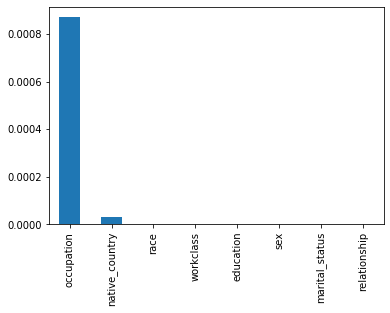

In [31]:
p_values.plot.bar();

In [29]:
chi_square_values = chi_scores[0].tolist()
p_values = chi_scores[1].tolist()

score_df = pd.DataFrame.from_dict(dict(chi_square = chi_square_values, p_values = p_values), orient="index", columns=["workclass","education","marital_status",
    "occupation","relationship","race","sex","native_country"])


# Describe while suppressing scientific notation
pd.set_option("display.float_format", lambda x: f"{x:.5f}")
# Show the results dataframe
display(score_df)
# Reset Pandas display back to normal
pd.reset_option("display.float_format")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
chi_square,47.24643,297.94227,1123.46982,11.08499,3659.14312,33.03131,502.43942,17.36388
p_values,0.00000,0.00000,0.00000,0.00087,0.00000,0.00000,0.00000,0.00003


In [33]:
chisqare_df.shape

(32561, 21)

In [115]:
workclass_contengency = pd.crosstab(
    index=chisquare_df["inc_over_fifty"], columns=chisquare_df["workclass"], margins=True)

# workclass_contengency.index=["income_under_50K","income_over_50K","Total"]

# workclass_contengency = pd.DataFrame.rename({"workclass":None})

# workclass_contengency = workclass_contengency.reset_index()
# workclass_contengency.rename({0:"Name1"})
# workclass_contengency.index.name=None

new_header =  workclass_contengency.iloc[0]

df = workclass_contengency.iloc[1:,:]
df

workclass,0,1,2,3,4,5,6,7,8,All
inc_over_fifty,,,,,,,,,,
1,371,617,0,4963,622,724,353,191,0,7841
All,960,2093,7,22696,1116,2541,1298,1836,14,32561


In [54]:
cols = list(chisquare_df["workclass"].columns)
cols.insert

AttributeError: 'Series' object has no attribute 'columns'

In [55]:
del workclass_contengency.index.name

workclass_contengency

workclass,0,1,2,3,4,5,6,7,8,All
income_under_50K,589,1476,7,17733,494,1817,945,1645,14,24720
income_over_50K,371,617,0,4963,622,724,353,191,0,7841
Total,960,2093,7,22696,1116,2541,1298,1836,14,32561
